#Student Name: Justin Figueroa
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [ ]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import _pickle as cPickle

#Part 0: Importing and normalizing data

In [ ]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000, 10) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 0s 0us/step


#Part 1: Plotting cross entropy

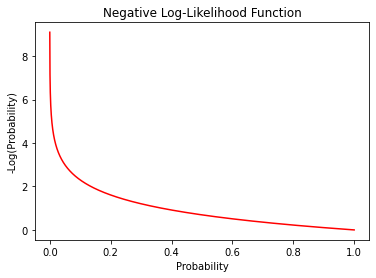

In [ ]:
#Show cross-entropy loss function

#9000 evenly distributed x from (0,1] 
probability = np.linspace(0, 1, 9000)
probability = probability[1:len(probability)]

#create a list of negative log of each x
lgx = []
for i in probability:
  lgx.append(-np.log(i))

plt.plot(probability, lgx, color = 'r')
plt.xlabel('Probability')
plt.ylabel('-Log(Probability)')
plt.title('Negative Log-Likelihood Function')
plt.show()

#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape = (28, 28, 1))) 
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'valid', data_format = None)) 
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation = 'sigmoid', input_shape = (28, 28, 1))) 
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'valid', data_format = None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten()) 
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal")) 
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal")) 
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation = "softmax")) 

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss = 'mean_squared_error',
                    optimizer = 'RMSprop',
                    metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs = 200, batch_size = 1024, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1] * 100))

Epoch 1/200
59/59 [==============================] - 26s 167ms/step - loss: 0.0917 - accuracy: 0.1056 - val_loss: 0.0901 - val_accuracy: 0.1538
Epoch 2/200
59/59 [==============================] - 7s 116ms/step - loss: 0.0817 - accuracy: 0.2713 - val_loss: 0.0824 - val_accuracy: 0.2597
Epoch 3/200
59/59 [==============================] - 9s 146ms/step - loss: 0.0540 - accuracy: 0.5838 - val_loss: 0.0477 - val_accuracy: 0.6168
Epoch 4/200
59/59 [==============================] - 7s 120ms/step - loss: 0.0442 - accuracy: 0.6660 - val_loss: 0.0389 - val_accuracy: 0.7142
Epoch 5/200
59/59 [==============================] - 10s 167ms/step - loss: 0.0397 - accuracy: 0.7035 - val_loss: 0.0389 - val_accuracy: 0.7072
Epoch 6/200
59/59 [==============================] - 9s 146ms/step - loss: 0.0370 - accuracy: 0.7246 - val_loss: 0.0362 - val_accuracy: 0.7292
Epoch 7/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0351 - accuracy: 0.7397 - val_loss: 0.0327 - val_accuracy: 0.75

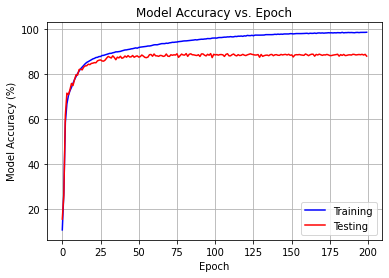

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()


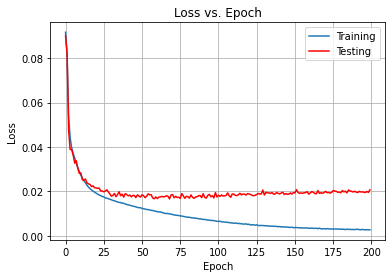

In [ ]:
#Plot loss vs epoch
a = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['loss'], label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) 
    
    #30% dropout
    model.add(Dropout(0.30)) 
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) 
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) 
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten()) 
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) 
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation="softmax"))

    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_in_mData = CNN_dropout_in.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 13s 215ms/step - loss: 0.0923 - accuracy: 0.1008 - val_loss: 0.0906 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 11s 193ms/step - loss: 0.0888 - accuracy: 0.1463 - val_loss: 0.0807 - val_accuracy: 0.2757
Epoch 3/200
59/59 [==============================] - 11s 187ms/step - loss: 0.0646 - accuracy: 0.4816 - val_loss: 0.0545 - val_accuracy: 0.5488
Epoch 4/200
59/59 [==============================] - 14s 234ms/step - loss: 0.0480 - accuracy: 0.6356 - val_loss: 0.0452 - val_accuracy: 0.6629
Epoch 5/200
59/59 [==============================] - 12s 210ms/step - loss: 0.0414 - accuracy: 0.6901 - val_loss: 0.0404 - val_accuracy: 0.7131
Epoch 6/200
59/59 [==============================] - 13s 215ms/step - loss: 0.0389 - accuracy: 0.7100 - val_loss: 0.0375 - val_accuracy: 0.7272
Epoch 7/200
59/59 [==============================] - 12s 200ms/step - loss: 0.0363 - accuracy: 0.7311 - val_loss: 0.0359 - val_accuracy:

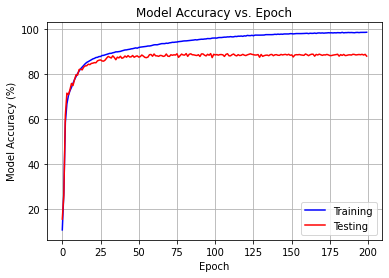

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

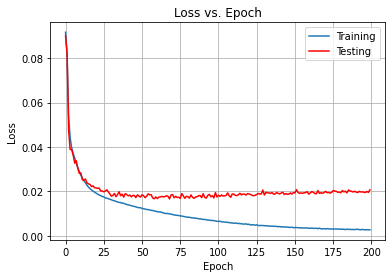

In [ ]:
#Plot loss vs epoch
a = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['loss'], label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()
    
    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) 
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten())
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) 
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mData = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 15s 239ms/step - loss: 0.0942 - accuracy: 0.0996 - val_loss: 0.0901 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 11s 188ms/step - loss: 0.0885 - accuracy: 0.1591 - val_loss: 0.0831 - val_accuracy: 0.2564
Epoch 3/200
59/59 [==============================] - 12s 201ms/step - loss: 0.0673 - accuracy: 0.4451 - val_loss: 0.0609 - val_accuracy: 0.6007
Epoch 4/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0488 - accuracy: 0.6273 - val_loss: 0.0583 - val_accuracy: 0.5348
Epoch 5/200
59/59 [==============================] - 11s 192ms/step - loss: 0.0426 - accuracy: 0.6809 - val_loss: 0.0425 - val_accuracy: 0.7131
Epoch 6/200
59/59 [==============================] - 11s 186ms/step - loss: 0.0394 - accuracy: 0.7047 - val_loss: 0.0450 - val_accuracy: 0.6727
Epoch 7/200
59/59 [==============================] - 8s 142ms/step - loss: 0.0376 - accuracy: 0.7212 - val_loss: 0.0393 - val_accuracy: 

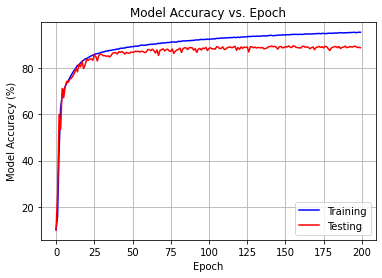

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(CNN_dropout_hidden_mData.epoch, [i*100 for i in CNN_dropout_hidden_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_hidden_mData.epoch, [i*100 for i in CNN_dropout_hidden_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

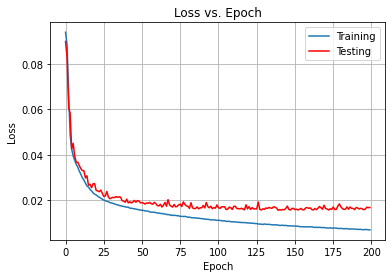

In [ ]:
#Plot loss vs epoch
a = plt.plot(CNN_dropout_hidden_mData.epoch, CNN_dropout_hidden_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_hidden_mData.epoch, CNN_dropout_hidden_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten())
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation="softmax"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_mData = CNN_dropout_both.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 32s 306ms/step - loss: 0.0921 - accuracy: 0.1002 - val_loss: 0.0902 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0885 - accuracy: 0.1538 - val_loss: 0.0833 - val_accuracy: 0.2616
Epoch 3/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0638 - accuracy: 0.4890 - val_loss: 0.0561 - val_accuracy: 0.6271
Epoch 4/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0497 - accuracy: 0.6200 - val_loss: 0.0463 - val_accuracy: 0.6722
Epoch 5/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0445 - accuracy: 0.6651 - val_loss: 0.0471 - val_accuracy: 0.6612
Epoch 6/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0413 - accuracy: 0.6901 - val_loss: 0.0420 - val_accuracy: 0.6908
Epoch 7/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0392 - accuracy: 0.7088 - val_loss: 0.0410 - val_accuracy:

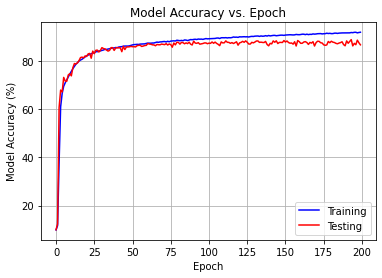

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(CNN_dropout_both_mData.epoch, [i*100 for i in CNN_dropout_both_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_mData.epoch, [i*100 for i in CNN_dropout_both_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

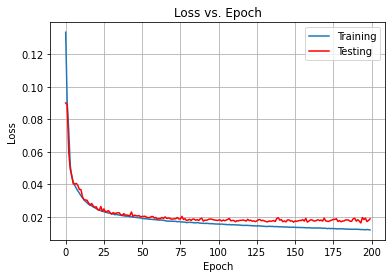

In [ ]:
#Plot loss vs epoch
a = plt.plot(CNN_dropout_both_mData.epoch, CNN_dropout_both_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_mData.epoch, CNN_dropout_both_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 5 : Activation Functions

Point 1: Sigmoid activation function at output layer

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # use 'sigmoid' for point 1 and use 'tanh' for point 2
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten())
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation="sigmoid"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_mData = CNN_dropout_both_act.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 18s 284ms/step - loss: 0.0988 - accuracy: 0.0988 - val_loss: 0.0953 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 17s 281ms/step - loss: 0.0911 - accuracy: 0.1013 - val_loss: 0.0919 - val_accuracy: 0.1000
Epoch 3/200
59/59 [==============================] - 17s 280ms/step - loss: 0.0905 - accuracy: 0.1168 - val_loss: 0.0921 - val_accuracy: 0.1199
Epoch 4/200
59/59 [==============================] - 17s 280ms/step - loss: 0.0786 - accuracy: 0.3453 - val_loss: 0.0721 - val_accuracy: 0.4703
Epoch 5/200
59/59 [==============================] - 17s 280ms/step - loss: 0.0617 - accuracy: 0.5278 - val_loss: 0.0660 - val_accuracy: 0.5385
Epoch 6/200
59/59 [==============================] - 17s 280ms/step - loss: 0.0516 - accuracy: 0.6175 - val_loss: 0.0503 - val_accuracy: 0.6461
Epoch 7/200
59/59 [==============================] - 17s 280ms/step - loss: 0.0462 - accuracy: 0.6632 - val_loss: 0.0457 - val_accuracy:

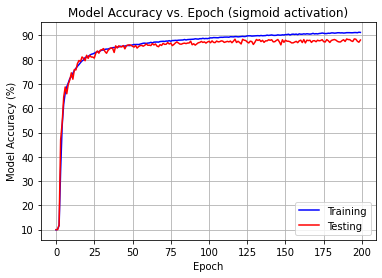

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

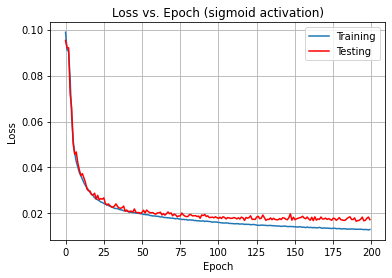

In [ ]:
#Plot loss vs epoch
a = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Point 2: Tanh activation function at output layer

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # use 'sigmoid' for point 1 and use 'tanh' for point 2
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 2 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    
    #30% dropout
    model.add(Dropout(0.30))
    
    #hidden layer 4 (2x2 max-pooling)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    
    #hidden layer 5 (layer to flatten data)
    model.add(Flatten())
    
    #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #output layer (10 perceptrons)
    model.add(Dense(10, activation="tanh"))

    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_mData = CNN_dropout_both_act.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 26s 163ms/step - loss: 0.2469 - accuracy: 0.0990 - val_loss: 0.0917 - val_accuracy: 0.1890
Epoch 2/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0956 - accuracy: 0.1015 - val_loss: 0.0929 - val_accuracy: 0.1000
Epoch 3/200
59/59 [==============================] - 8s 141ms/step - loss: 0.0911 - accuracy: 0.0999 - val_loss: 0.0919 - val_accuracy: 0.1000
Epoch 4/200
59/59 [==============================] - 8s 142ms/step - loss: 0.0907 - accuracy: 0.1297 - val_loss: 0.0916 - val_accuracy: 0.1745
Epoch 5/200
59/59 [==============================] - 8s 143ms/step - loss: 0.0783 - accuracy: 0.3651 - val_loss: 0.0758 - val_accuracy: 0.4339
Epoch 6/200
59/59 [==============================] - 9s 145ms/step - loss: 0.0647 - accuracy: 0.5201 - val_loss: 0.0602 - val_accuracy: 0.5663
Epoch 7/200
59/59 [==============================] - 9s 146ms/step - loss: 0.0556 - accuracy: 0.6033 - val_loss: 0.0530 - val_accuracy: 0.655

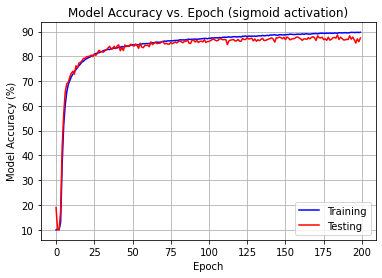

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

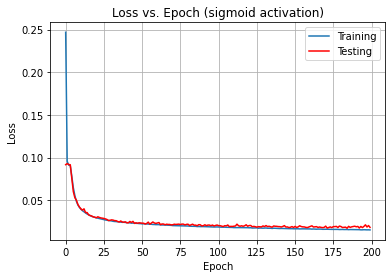

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
#!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
#!tar -xvjf RML2016.10b.tar.bz2

# MY EDITS
!wget https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20220124191622_6eff27bcb1e58e0d4d94cc5a_94011e2bab3ffa0d31ba1ed945fe972d81e9348e_002_20220124201622_0027_dnld
!tar -xvjf RML2016.10b.tar.bz2?Authorization=3_20220124191622_6eff27bcb1e58e0d4d94cc5a_94011e2bab3ffa0d31ba1ed945fe972d81e9348e_002_20220124201622_0027_dnld
!echo "Extraction Complete"

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat", 'rb'), encoding="latin1")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
print(Y_train)
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))
print(Y_test)
#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
print(X_train)
X_test = X_test.reshape(108000, 2, 128, 1)
print(X_test)

--2022-01-24 19:18:03--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20220124191622_6eff27bcb1e58e0d4d94cc5a_94011e2bab3ffa0d31ba1ed945fe972d81e9348e_002_20220124201622_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2?Authorization=3_20220124191622_6eff27bcb1e58e0d4d94cc5a_94011e2bab3ffa0d31ba1ed945fe972d81e9348e_002_20220124201622_0027_dnld’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  46.7MB/s    in 27s     

2022-01-24 19:18:30 (44.6 MB/s) - ‘RML2016.10b.tar.bz2?Authorization=3_20220124191622_6eff27bcb1e58e0d4d94cc5a_94011e2bab3ffa0d31ba1ed945fe972d81e9348e_002_20220124201622_0027_dnld’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT
Extraction Complete
[[0. 0. 0. 

In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    model.add(Conv2D(256, (1, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (2, 3), activation='sigmoid'))    
    model.add(Conv2D(80, (1, 3), activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Conv2D(80, (1, 3), activation='sigmoid'))
    #model.summary()
    model.add(Reshape((-1,96)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(128, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="relu", kernel_initializer="normal"))
    
    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cldnn_mData = cldnn.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = cldnn.evaluate(data_test, labels_test)
print("Accuracy: %.2f"%(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 36s 376ms/step - loss: 0.0932 - accuracy: 0.0995 - val_loss: 0.0931 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 20s 347ms/step - loss: 0.0931 - accuracy: 0.1002 - val_loss: 0.0930 - val_accuracy: 0.1000
Epoch 3/200
59/59 [==============================] - 21s 348ms/step - loss: 0.0930 - accuracy: 0.0993 - val_loss: 0.0930 - val_accuracy: 0.1000
Epoch 4/200
59/59 [==============================] - 20s 347ms/step - loss: 0.0930 - accuracy: 0.1018 - val_loss: 0.0931 - val_accuracy: 0.1000
Epoch 5/200
59/59 [==============================] - 20s 347ms/step - loss: 0.0927 - accuracy: 0.1009 - val_loss: 0.0921 - val_accuracy: 0.1000
Epoch 6/200
59/59 [==============================] - 20s 347ms/step - loss: 0.0920 - accuracy: 0.1017 - val_loss: 0.0921 - val_accuracy: 0.1000
Epoch 7/200
59/59 [==============================] - 20s 347ms/step - loss: 0.0920 - accuracy: 0.1005 - val_loss: 0.0920 - val_accuracy:

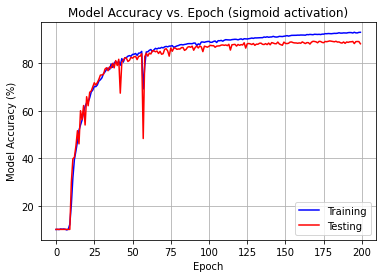

In [ ]:
#Plot accuracy vs epoch
a = plt.plot(cldnn_mData.epoch, [i*100 for i in cldnn_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(cldnn_mData.epoch, [i*100 for i in cldnn_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

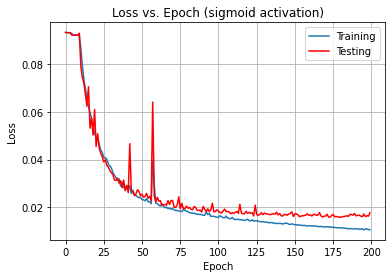

In [ ]:
#Plot loss vs epoch
a = plt.plot(cldnn_mData.epoch, cldnn_mData.history['loss'], label="Training")
b = plt.plot(cldnn_mData.epoch, cldnn_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()